In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv("Cleaned_1_data.csv")

ardi_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,ConditionType,Category,Cause_of_Death,Data_Value_Alt,Effect,ConsumptionPattern,Sex,AgeGroup
0,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),10.0,Harmful Effects,Excessive Alcohol Use,Overall,65+
1,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),54.0,Harmful Effects,Excessive Alcohol Use,Overall,50-64
2,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),82.0,Harmful Effects,Excessive Alcohol Use,Overall,35-49
3,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,115.0,Harmful Effects,Excessive Alcohol Use,Overall,20-34
4,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,23.0,Harmful Effects,Excessive Alcohol Use,Overall,0-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcohol abuse,12.0,Harmful Effects,Any Alcohol Use,Overall,50-64
4123,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,14.0,Harmful Effects,Any Alcohol Use,Overall,65+
4124,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,24.0,Harmful Effects,Any Alcohol Use,Overall,35-49
4125,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,43.0,Harmful Effects,Any Alcohol Use,Overall,50-64


In [3]:
unique_cat = ardi_data['Category'].unique()
print(unique_cat)

['Alcohol-Related Poisonings' 'Motor Vehicle Traffic Crashes'
 'Other Acute Causes' 'Suicide' '100% Alcohol-Attributable' 'Cancer'
 'Heart Disease and Stroke' 'Liver, Gallbladder, and Pancreas'
 'Other Chronic Causes']


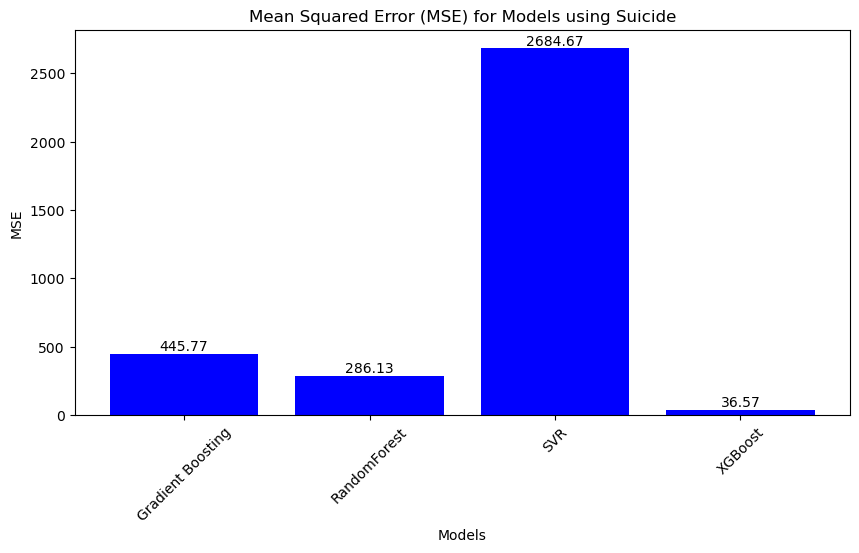

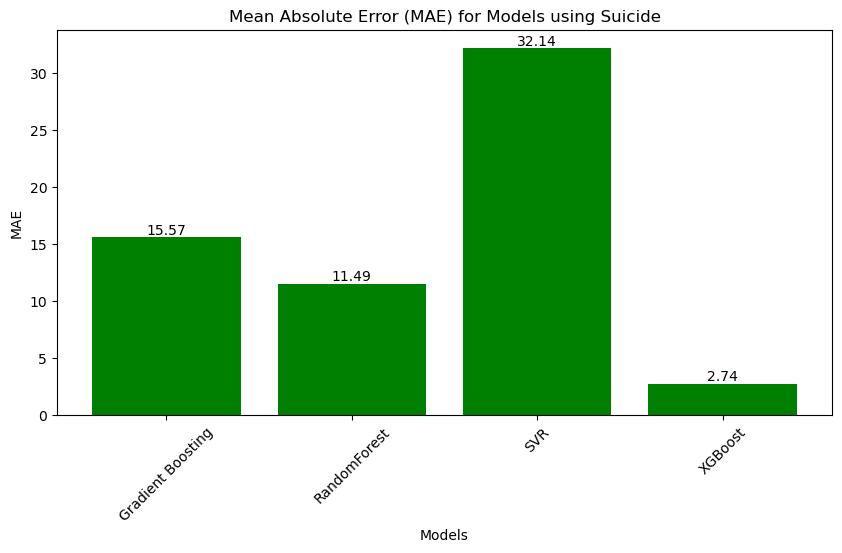

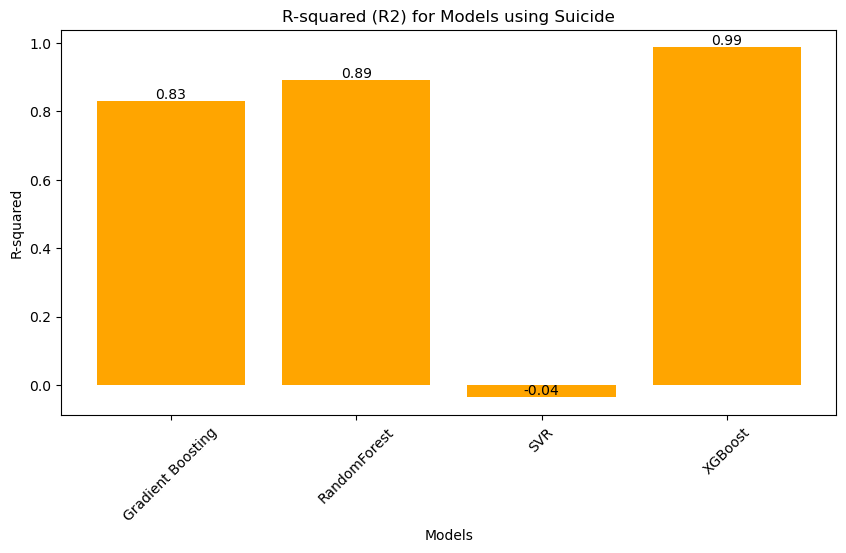

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def predict_with_models(ardi_data, category_value):
    # Encode categorical variables
    label_encoders = {}
    categorical_columns = ['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Cause_of_Death']
    
    for col in categorical_columns:
        le = LabelEncoder()
        ardi_data[col] = le.fit_transform(ardi_data[col])
        label_encoders[col] = le

    # Filter data by category value
    filtered_data = ardi_data[ardi_data['Category'] == category_value]
    
    # Check if there are enough samples for training and testing
    if len(filtered_data) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    # Split data into features and target
    X = filtered_data[['LocationDesc', 'ConsumptionPattern', 'ConditionType', 'AgeGroup', 'Cause_of_Death']]
    y = filtered_data['Data_Value_Alt']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'RandomForest': RandomForestRegressor(),
        'SVR': SVR(kernel='linear'),
        'XGBoost': XGBRegressor()
    }

    # Make predictions and evaluate each model
    mse_results = {}
    mae_results = {}
    r2_results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_results[model_name] = mse
        mae_results[model_name] = mae
        r2_results[model_name] = r2

    # Plot MSE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mse_results.keys(), mse_results.values(), color='blue')
    plt.title(f'Mean Squared Error (MSE) for Models using {category_value}')
    plt.xlabel('Models')
    plt.ylabel('MSE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mse in zip(bars, mse_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot MAE for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(mae_results.keys(), mae_results.values(), color='green')
    plt.title(f'Mean Absolute Error (MAE) for Models using {category_value}')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, mae in zip(bars, mae_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

    plt.show()

    # Plot R-squared for all models
    plt.figure(figsize=(10, 5))
    bars = plt.bar(r2_results.keys(), r2_results.values(), color='orange')
    plt.title(f'R-squared (R2) for Models using {category_value}')
    plt.xlabel('Models')
    plt.ylabel('R-squared')
    plt.xticks(rotation=45)
    
    # Add annotations to the bars
    for bar, r2 in zip(bars, r2_results.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

    plt.show()

# Load your ARDI data
ardi_data = pd.read_csv("Cleaned_1_data.csv")

# Specify the category value for filtering
category_value = 'Suicide'

# Perform prediction with models for the specified category value
predict_with_models(ardi_data, category_value)


In [4]:
# category based 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Category using SVR
def predict_by_Category_svr(category):
    df_filtered = ardi_data[ardi_data['Category'] == category]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = SVR(kernel='linear')  # Using a linear kernel for SVR
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     model = SVR(kernel='rbf')  # Using RBF kernel for SVR
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)
    
    svr_mse = mean_squared_error(y_test, y_pred)
    svr_mae = mean_absolute_error(y_test, y_pred)
    svr_r2 = r2_score(y_test, y_pred)
    
    return y_pred, svr_mse, svr_mae, svr_r2

# Example prediction using SVR based on Category
category = 'Suicide'

prediction, svr_mse, svr_mae, svr_r2 = predict_by_Category_svr(category)
print(f"SVR Predicted values for '{category}':", prediction)
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R2):", svr_r2)


SVR Predicted values for 'Suicide': [44.48632367 52.70564251 51.75725957 48.44214704 44.16476437 46.82287111
 47.9250901  46.52606231 49.06051514 46.2292535  39.8873817  42.10570688
 44.00247277 42.10027524 45.11857896 37.99604746 48.408941   39.08740316
 36.86062243 40.9896007  45.24223287 37.19063728 45.43470661 48.4228282
 41.00348789 37.35836052 45.56379217 35.92612668 41.31961554 44.46700482
 50.80887662 42.71321169 36.56381363 43.38410467 47.7766857  39.26055805
 39.5905729  35.27998419 45.89923866 48.719637   43.06797703 38.12513302
 53.18406176 36.40997758 49.07440233 44.96474291 38.45514787 49.69277043
 39.89281335 51.75182792 52.38408322 38.00993466 41.95187084 41.1518923
 45.87991982 50.49274897 39.11215365 47.17763645 39.09283481 42.26799848
 44.31860042 36.87450963 40.37666424 51.58410467 40.68736025 38.44126067
 45.11314732 44.31316877 46.06153026 50.47343013]
Mean Squared Error (MSE): 2684.6692342288407
Mean Absolute Error (MAE): 32.14223943009835
R-squared (R2): -0.0360

In [5]:
# Category based 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Category using Gradient Boosting
def predict_by_Category_gb(category):
    df_filtered = ardi_data[ardi_data['Category'] == category]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = GradientBoostingRegressor()  # Using Gradient Boosting for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    gb_mse = mean_squared_error(y_test, y_pred)
    gb_mae = mean_absolute_error(y_test, y_pred)
    gb_r2 = r2_score(y_test, y_pred)
    
    return y_pred, gb_mse, gb_mae, gb_r2

# Example prediction using Gradient Boosting based on Category
category = 'Suicide'

prediction,gb_mse, gb_mae, gb_r2 = predict_by_Category_gb(category)
print(f"Gradient Boosting Predicted values for '{category}':", prediction)
print("Mean Squared Error (MSE):", gb_mse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared (R2):", gb_r2)


Gradient Boosting Predicted values for 'Suicide': [ 33.92502797  35.86631754  53.30671711  68.78987363  56.53075097
  33.17395785  21.17283525  88.91939113  63.87336601  16.80455404
  41.89313707  40.60474357  46.54141603  39.49540146  35.36629919
  75.73406063 200.13452931  43.67432428  57.26364588  39.49540146
  17.75365909  72.29362134  16.80455404  90.78096923  43.00247918
  50.36340849  75.18569134  25.35325609  67.07882387  32.7940029
 156.89582078  17.32620125  50.36340849  25.17369011  61.20187865
 164.37875178  52.1602447   70.3506796   38.38536438  21.17283525
  25.17369011  22.4826659   24.94218019  50.96342482  70.03805259
  41.09969751 162.16169985  67.98085736  43.00247918  72.51405656
  44.14951965  41.53020362  40.60474357  39.49540146  76.4338703
  46.36422987  28.68439805  22.76273426  41.89313707  40.60474357
  50.79735265 235.06606903  70.74501899  41.48752601  43.00247918
  18.51254734  50.79735265  49.68801054  33.90334501  69.85206292]
Mean Squared Error (MSE): 4

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Category using XGBoost
def predict_by_Category_xgb(category):
    df_filtered = ardi_data[ardi_data['Category'] == category]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = XGBRegressor()  # Using XGBoost for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    xgboost_mse = mean_squared_error(y_test, y_pred)
    xgboost_mae = mean_absolute_error(y_test, y_pred)
    xgboost_r2 = r2_score(y_test, y_pred)
    
    return y_pred, xgboost_mse, xgboost_mae, xgboost_r2

# Example prediction using XGBoost based on category
category = 'Suicide'

prediction, xgboost_mse, xgboost_mae, xgboost_r2 = predict_by_Category_xgb(category)
print(f"XGBoost Predicted values for '{category}':", prediction)
print("Mean Squared Error (MSE):", xgboost_mse)
print("Mean Absolute Error (MAE):", xgboost_mae)
print("R-squared (R2):", xgboost_r2)


XGBoost Predicted values for 'Suicide': [ 26.085215  34.022495  54.907665  65.527405  95.56989   18.03054
  39.678967 100.13256   51.390083  16.747581  14.329306  43.89747
  25.047297  42.2377    48.41186   72.435776 245.39008   15.123643
  13.186585  48.434338  13.567754  78.18704   16.747581 112.24776
  23.306366  31.545315  12.52475   19.302988  95.27993   35.699356
 135.27603   14.897339  31.403212  33.910896  13.504817 235.59691
  43.289574  42.405334  56.231785  38.96341   18.939854  17.876175
  17.961302  49.814625  76.062325  60.942776 158.21703   72.57676
  19.844225  71.31278   22.141428  37.024628  28.959084  29.368713
  99.64667   53.128487  17.964825  10.990393  13.828596  29.467316
  57.51693  245.99138   60.427258  24.938456  20.344933  12.320912
  54.094147  62.85225   38.605892  69.00878 ]
Mean Squared Error (MSE): 36.56734835228886
Mean Absolute Error (MAE): 2.7405488286699566
R-squared (R2): 0.9858887113375895


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Category using Random Forest
def predict_by_Category_rf(category):
    df_filtered = ardi_data[ardi_data['Category'] == category]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()  # Using RandomForestRegressor for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rf_mse = mean_squared_error(y_test, y_pred)
    rf_mae = mean_absolute_error(y_test, y_pred)
    rf_r2 = r2_score(y_test, y_pred)
    
    return y_pred, rf_mse, rf_mae, rf_r2

# Example prediction using Random Forest based on category
category = 'Suicide'

prediction, rf_mse, rf_mae, rf_r2 = predict_by_Category_rf(category)
print(f"Random Forest Predicted values for '{category}':", prediction)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)


Random Forest Predicted values for 'Suicide': [ 35.63  35.37  49.79  68.62  84.24  14.06  46.19 100.3   54.6   23.62
  48.98  42.14  28.37  42.64  41.29  74.81 225.63  47.25  45.6   44.7
  15.41  70.56  23.02 105.81  24.18  34.25  41.88  19.72  84.29  34.03
 142.88  16.08  34.2   28.86  27.62 209.7   57.67  89.05  48.69  47.44
  20.    18.7   28.65  40.16  74.18  50.38 157.36  73.4   49.72  75.05
  34.34  41.19  31.93  32.31  90.17  58.52  28.38  17.91  48.08  31.45
  54.6  223.48  68.08  34.81  50.52  15.79  51.56  53.68  35.69  68.23]
Mean Squared Error (MSE): 256.80582999999996
Mean Absolute Error (MAE): 10.963857142857144
R-squared (R2): 0.9008989888354021


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables

label_encoders = {}
categorical_columns = ['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Category using Linear Regression
def predict_by_Category_linear(category):
    df_filtered = ardi_data[ardi_data['Category'] == category]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationDesc','ConsumptionPattern', 'ConditionType', 'AgeGroup','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()  # Using Linear Regression for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    linear_mse = mean_squared_error(y_test, y_pred)
    linear_mae = mean_absolute_error(y_test, y_pred)
    linear_r2 = r2_score(y_test, y_pred)
    
    return y_pred, linear_mse, linear_mae, linear_r2

# Example prediction using Linear Regression based on category
category = 'Suicide'

prediction, linear_mse, linear_mae, linear_r2 = predict_by_Category_linear(category)
print(f"Linear Regression Predicted values for '{category}':", prediction)
print("Mean Squared Error (MSE):", linear_mse)
print("Mean Absolute Error (MAE):", linear_mae)
print("R-squared (R2):", linear_r2)


Linear Regression Predicted values for 'Suicide': [64.15223247 56.61872385 57.48797485 63.12721708 62.88064674 47.94316946
 44.33217955 56.54931943 55.79265285 65.1554694  62.63407639 62.16716014
 60.42865815 60.60582407 63.57273181 65.93391445 48.05575387 59.2002524
 54.47344115 59.02308648 49.39192112 60.93875439 63.28298148 54.81081744
 65.77815005 64.95207904 50.66350685 62.09775572 65.48839972 55.83583283
 58.35722584 51.70992377 63.07959112 67.76322238 48.63525453 64.77491312
 71.24022636 55.92219281 58.69015616 46.20466747 68.05297272 53.31443983
 58.78096211 65.82133004 62.54771642 66.31447073 59.77975306 55.21315218
 64.19541246 55.92663878 55.34713812 72.68897802 64.90889906 61.47507507
 50.37375652 58.64697617 69.07798811 64.28621841 60.76158847 64.61914872
 60.13890782 61.22850472 67.91898678 51.91331413 66.06790038 53.02468949
 62.01139574 58.57757175 61.14214475 50.33057654]
Mean Squared Error (MSE): 2695.3554994148108
Mean Absolute Error (MAE): 37.60212560933834
R-square

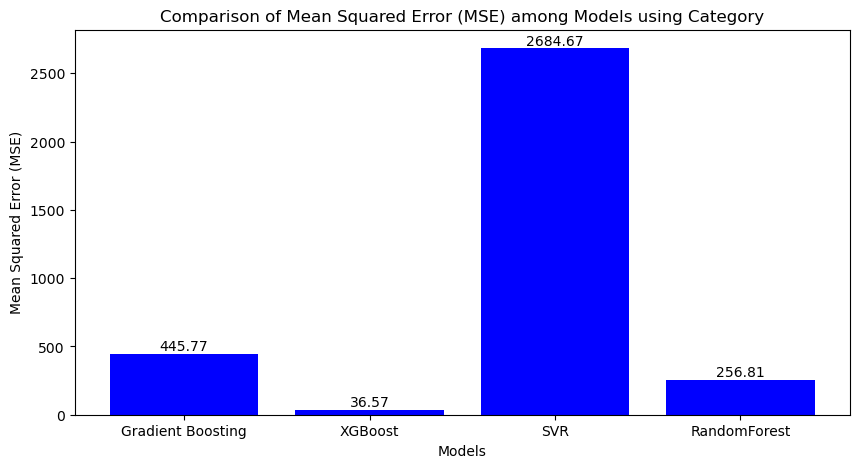

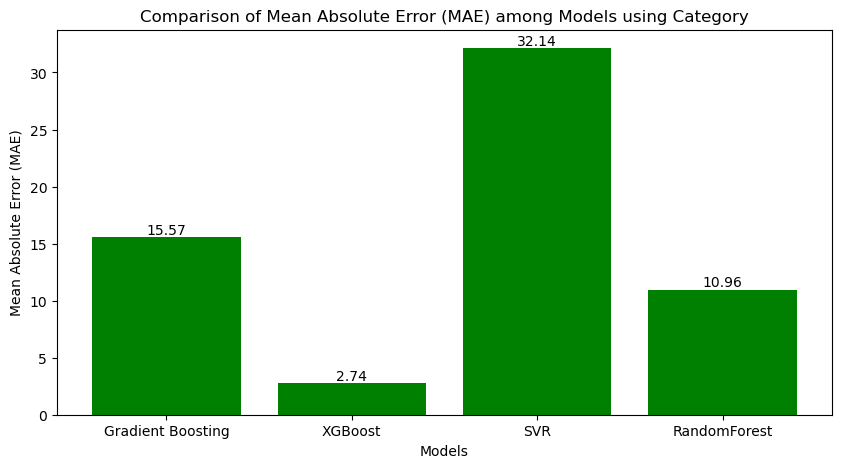

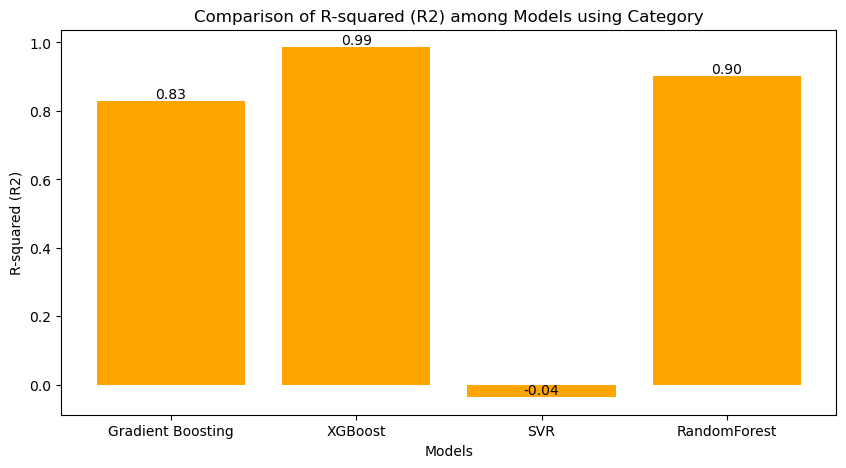

In [9]:
import matplotlib.pyplot as plt

# Create a list of model names and their respective metrics
models = ['Gradient Boosting', 'XGBoost', 'SVR', 'RandomForest']
mse_scores = [gb_mse, xgboost_mse, svr_mse, rf_mse]
mae_scores = [gb_mae, xgboost_mae, svr_mae,rf_mae]
r2_scores = [gb_r2, xgboost_r2, svr_r2,rf_r2]

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models using Category')

# Add annotations to the bars
for bar, mse in zip(bars, mse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

plt.show()


# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Models using Category')
# Add annotations to the bars
for bar, mae in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

plt.show()

# Plot R-squared (R2)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) among Models using Category')
# Add annotations to the bars
for bar, r2 in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

plt.show()

